# Predicting Car Prices

The goal of this project is to use K Nearest to predict the market price of cars based on a number of it's attributes. K nearest computes the elucidean distance to find similarity and average in order to predict unknown values.  

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here-https://archive.ics.uci.edu/ml/datasets/automobile]. 

Throughout the project I will be looking to achieve the lowest Square root mean squared error (RMSE). This will show that there is the smallest error between the price and the predicted price. 

To start with we need to clean the data. Only numeric values will be useful for this project.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

# Rename columns
col_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels"
,"engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size"
,"fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
file = pd.read_csv("imports-85.data", names = col_names)

In [2]:
file.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Replace '?'
file["num-of-doors"] = file["num-of-doors"].replace("four", 4).replace("two", 2).replace("?", np.nan)
file['num-of-cylinders'] = file['num-of-cylinders'].replace("four", 4).replace("six", 6).replace("five", 5).replace("eight", 8).replace("two", 2).replace("three", 3).replace("twelve", 12)
file = file.replace("?", np.nan)

In [4]:
# Remove non numeric columns
numeric_cols = list(file.columns)
cols_to_drop = ["make", "fuel-type", "aspiration", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"]
for cols in cols_to_drop:
    if cols in numeric_cols:
        numeric_cols.remove(cols)

We also need to normalize the columns so that individual values do not overly affect the results. Below we will keep the same scale for values but ensure that all values are between 0 and 1. The only column that will remain the same is the price column as this is the target column for our analysis. 

# Data Normalization

In [5]:
normalized_cars = file[numeric_cols].copy()
# drop Na columns
normalized_cars.dropna(inplace=True)

# convert columns to numeric values
normalized_cars["price"] = normalized_cars["price"].astype(int)
normalized_cars["peak-rpm"] = normalized_cars["peak-rpm"].astype(int)
normalized_cars["horsepower"] = normalized_cars["horsepower"].astype(int)
normalized_cars["stroke"] = normalized_cars["stroke"].astype(float)
normalized_cars["bore"] = normalized_cars["bore"].astype(float)
normalized_cars["normalized-losses"] = normalized_cars["normalized-losses"].astype(int)

# Normalize columns between 0 and 1 except for target column price
saved_price = normalized_cars["price"]
normalized_cars = (normalized_cars - normalized_cars.min()) / (normalized_cars.max() - normalized_cars.min())
normalized_cars["price"] = saved_price
normalized_cars.head(5)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.8,0.518325,1.0,0.455172,0.577236,0.517544,0.471154,0.329325,0.2,0.243655,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333,13950
4,0.8,0.518325,1.0,0.441379,0.577236,0.535088,0.471154,0.518231,0.4,0.380711,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111,17450
6,0.6,0.486911,1.0,0.662069,0.839024,0.973684,0.605769,0.525989,0.4,0.380711,0.464286,0.633333,0.09375,0.407895,0.551020,0.117647,0.194444,17710
8,0.6,0.486911,1.0,0.662069,0.839024,0.973684,0.625000,0.619860,0.4,0.355330,0.421429,0.633333,0.08125,0.605263,0.551020,0.058824,0.055556,23875
10,0.8,0.664921,0.0,0.503448,0.580488,0.394737,0.471154,0.351823,0.2,0.238579,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556,16430


Now that the dataset is ready lets begin. We will start by using a Univariate Model which only uses one attribute to train the data. For example, can we predict the price by finding the average price of the 5 cars with the most similar engine size. 

# Univariate Model

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


def knn_train_test(train_col, train_target, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    
    # Calculate Mean squared error
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[train_target])
    prediction = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

rmses = {}

# list of columns
columns = list(normalized_cars.columns)
columns.remove('price')

# Use function on each column
for col in columns:
    rmse = knn_train_test(col, "price", normalized_cars)
    rmses[col] = rmse
rmses

{'symboling': 4728.749369759409,
 'normalized-losses': 4417.589877750084,
 'num-of-doors': 4695.416567249385,
 'wheel-base': 2681.3032586785102,
 'length': 2222.3324409277748,
 'width': 2718.763254312519,
 'height': 4193.069881244528,
 'curb-weight': 2135.015488702599,
 'num-of-cylinders': 4390.61656194207,
 'engine-size': 2624.5118045076497,
 'bore': 3903.751335574539,
 'stroke': 4218.941348845703,
 'compression-ratio': 6224.4305330688685,
 'horsepower': 2211.671943801792,
 'peak-rpm': 5212.425816066834,
 'city-mpg': 2774.1447757822593,
 'highway-mpg': 2249.4344375864794}

Text(0.5, 1.0, 'RMSE for each car attribute')

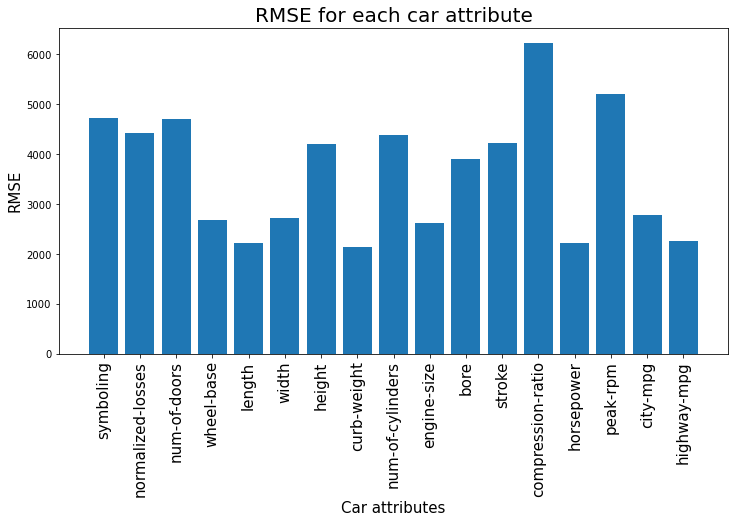

In [7]:
# Visaulize RMSE's
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(list(rmses.keys()), rmses.values())
plt.xticks(rotation=90, size=15)
plt.ylabel("RMSE", size=15)
plt.xlabel("Car attributes", size=15)
plt.title("RMSE for each car attribute", size=20)

We have a few attributes that are more accurate than the rest. The 5 attributes with the lowerst error in predciting the price are curb-weight, horsepower, length, highway-mpg and engine size. For each of these we looked at the 5 nearest neighbors. Let's see if we can get any more accurate by using the 1-10 closest neighbors. 

In [8]:
def knn_train_test(train_col, train_target, df, k_num):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    
    # Calculate Mean Squared Error
    knn = KNeighborsRegressor(k_num)
    knn.fit(train_df[[train_col]], train_df[train_target])
    prediction = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

# Test function on k neighbors 1-10
k_nums = list(range(1,11))

# Top 5 attributes
curb_weight = {}
for k in k_nums:
    rmse = knn_train_test("curb-weight", "price", normalized_cars, k)
    curb_weight[k] = rmse
    
horsepower = {}
for k in k_nums:
    rmse = knn_train_test("horsepower", "price", normalized_cars, k)
    horsepower[k] = rmse
    
length = {}
for k in k_nums:
    rmse = knn_train_test("length", "price", normalized_cars, k)
    length[k] = rmse
    
highway_mpg = {}
for k in k_nums:
    rmse = knn_train_test("highway-mpg", "price", normalized_cars, k)
    highway_mpg[k] = rmse
    
engine_size = {}
for k in k_nums:
    rmse = knn_train_test("engine-size", "price", normalized_cars, k)
    engine_size[k] = rmse

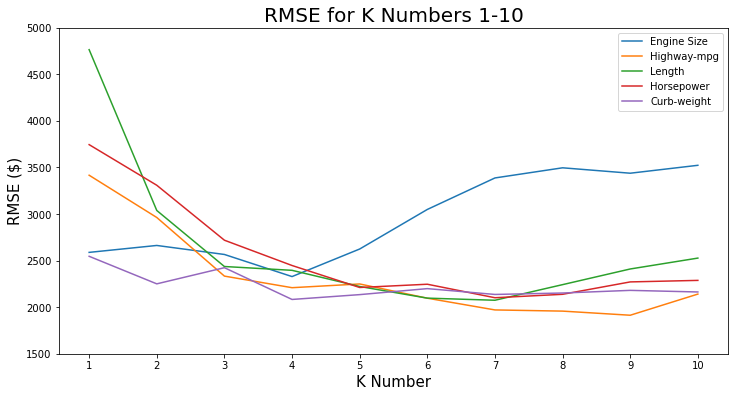

In [9]:
# Visaulaize 1-10 K numbers
plt.figure(figsize=(12, 6))
plt.plot(list(engine_size.keys()), list(engine_size.values()), label='Engine Size')
plt.plot(list(highway_mpg.keys()), list(highway_mpg.values()), label='Highway-mpg')
plt.plot(list(length.keys()), list(length.values()), label='Length')
plt.plot(list(horsepower.keys()), list(horsepower.values()), label='Horsepower')
plt.plot(list(curb_weight.keys()), list(curb_weight.values()), label='Curb-weight')


plt.ylim(1500,5000)
plt.ylabel("RMSE ($)", size=15)
plt.xlabel("K Number", size=15)
plt.xticks(range(1,11))
plt.title("RMSE for K Numbers 1-10", size=20)
plt.legend()

Engine size is a bit of an outlier here. For the other 4 it looks like a k number of 7-8 brings the most accurate predictions whereas with engine size the most accurate K number is 4.

Let's now increase the number of attributes we use to make our predictions. For example,  do we get less a smaller margin of error if we look at the cars with the most similar engine size, horsepower and highway-mpg rather than just one of these attributes.

# Multivariate Model

In [10]:
def knn_train_test(train_cols, train_target, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    # Calculate Mean Squared Errors
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[train_target])
    prediction = knn.predict(test_df[train_cols])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

# 2,3,4,5 best attributes
two_best = ["curb-weight", "horsepower"]
three_best = ["curb-weight", "horsepower", "length"]
four_best = ["curb-weight", "horsepower", "length", "highway-mpg"]
five_best = ["curb-weight", "horsepower", "length", "highway-mpg", "engine-size"]

# Function on 2,3,4,5th best features
rmse_two_best = knn_train_test(two_best, 'price', normalized_cars)
rmse_three_best = knn_train_test(three_best, 'price', normalized_cars)
rmse_four_best = knn_train_test(four_best, 'price', normalized_cars)
rmse_five_best = knn_train_test(five_best, 'price', normalized_cars)

print("RMSE with 2 best features: {}".format(rmse_two_best))
print("RMSE with 3 best features: {}".format(rmse_three_best))
print("RMSE with 4 best features: {}".format(rmse_four_best))
print("RMSE with 5 best features: {}".format(rmse_five_best))

RMSE with 2 best features: 2114.83344237791
RMSE with 3 best features: 1987.7541040078372
RMSE with 4 best features: 1970.0850007042845
RMSE with 5 best features: 2088.677455712107


These numbers are coming down. Let's continue to look for the lowest RMSE by using hyperparameter optimization whichlooks for the optimal hyperparameter value (i.e nest number of k neighbors). We are going to loop through 1-25 K neighbors along with the 3 best multivariate lists of attributes we found above. 

#  Hyperparameter Optimization

In [11]:
def knn_train_test(train_cols, train_target, df, k_num):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    
    # Calculate mean squared errors
    knn = KNeighborsRegressor(k_num)
    knn.fit(train_df[train_cols], train_df[train_target])
    prediction = knn.predict(test_df[train_cols])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

k_nums = list(range(1, 26))

with_top_five = {}
with_top_three = {}
with_top_four = {}

# Funtion on top 3 features
for k in k_nums:
    result = knn_train_test(five_best, 'price', normalized_cars, k)
    with_top_five[k] = result
for k in k_nums:
    result = knn_train_test(three_best, 'price', normalized_cars, k)
    with_top_three[k] = result
for k in k_nums:
    result = knn_train_test(four_best, 'price', normalized_cars, k)
    with_top_four[k] = result
    
print(with_top_five)
print("\n------------------------------------------------------------------------------------")
print(with_top_three)
print("\n------------------------------------------------------------------------------------")
print(with_top_four)

{1: 1908.7894986090007, 2: 1969.4308822601517, 3: 1689.1839145641372, 4: 1699.0605547625428, 5: 2088.677455712107, 6: 2216.58653050636, 7: 2196.2768958082734, 8: 2237.6074520288407, 9: 2291.708656180976, 10: 2276.801462139376, 11: 2216.5546668457564, 12: 2304.1030901039103, 13: 2377.847499850312, 14: 2417.2069982096855, 15: 2470.4970267809135, 16: 2459.711975643693, 17: 2530.581472647321, 18: 2498.490186808875, 19: 2451.4004451862365, 20: 2386.7422938233194, 21: 2366.631875259268, 22: 2364.885785390959, 23: 2407.2605812715133, 24: 2397.9911035271766, 25: 2371.8352317056097}

------------------------------------------------------------------------------------
{1: 1862.019622614112, 2: 2322.114474191572, 3: 2145.8102879021403, 4: 1870.5371383475656, 5: 1987.7541040078372, 6: 2158.100359691365, 7: 2336.875224699925, 8: 2407.477395078197, 9: 2530.6221487761745, 10: 2645.6187748804628, 11: 2654.205292767879, 12: 2605.759850159141, 13: 2617.5227623160417, 14: 2572.4166082951365, 15: 2565.587

Text(0.5, 1.0, 'Hyperparameter Optimization')

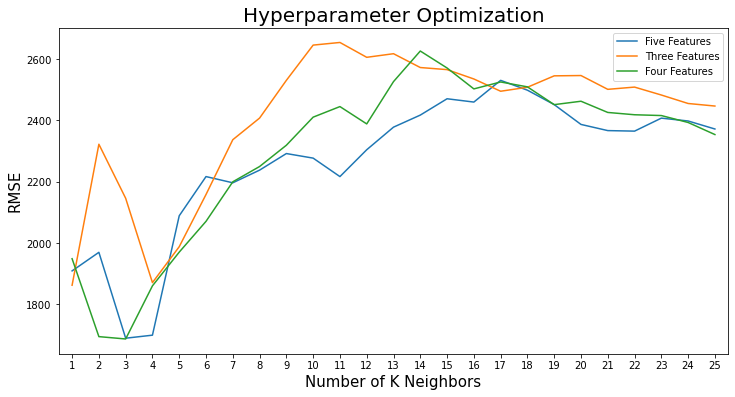

In [12]:
# Visualize Hyperparameter Optimization
plt.figure(figsize=(12,6))


plt.plot(list(with_top_five.keys()), list(with_top_five.values()), label = "Five Features")
plt.plot(list(with_top_three.keys()), list(with_top_three.values()), label = "Three Features")
plt.plot(list(with_top_four.keys()), list(with_top_four.values()), label = "Four Features")
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Neighbors", size=15)
plt.title("Hyperparameter Optimization", size=20)

The lowest RMSE's are found in the lower k neighbors (from 2-4). The singular lowest score came from using the attributes "curb-weight", "horsepower", "length", "highway-mpg", "engine-size" together along with a k number of 3. Throughout this project we have used the 75-25 train and test method in which you use 75% of the dataset to train the data and then the other 25% to test it. Let's finish by using a different technique k-folds. k-folds involves the following:

- splitting the full dataset into k equal length partitions.
- selecting k-1 partitions as the training set and
- selecting the remaining partition as the test set
- training the model on the training set.
- using the trained model to predict labels on the test fold.
- computing the test fold's error metric.
- repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- calculating the mean of the k error values.

Below we are going to loop through 1-25 k folds to see which gives the lowest RMSE.

In [13]:
from sklearn.model_selection import cross_val_score, KFold

# K fold function
def knn_train_test_kfold(train_cols, train_target, df, folds):
    rmses = []
    kf = KFold(folds, shuffle=True, random_state=1)
    model = KNeighborsRegressor(3)
    mses = cross_val_score(model, df[train_cols], df[train_target],
    scoring="neg_mean_squared_error", cv=kf)
    mses = list(mses)
    for v in mses:
        v = abs(v)
        rmse = v**(1/2)
        rmses.append(rmse)
    return rmses, np.mean(rmses), np.std(rmses)
    

k_folds = list(range(2,26))

k_folds_means = {}
k_folds_std = {}

# Loop through number of k folds
for n in k_folds:
    s = knn_train_test_kfold(five_best, "price", normalized_cars, n)
    k_folds_means[n] = s[1]
    k_folds_std[n] = s[2]
    
print(k_folds_means)
print("\n------------------------------------------------------------------")
print(k_folds_std)

{2: 2927.3460555374886, 3: 2618.0553343482184, 4: 2295.8348274216028, 5: 2296.8260632154092, 6: 2273.234462030219, 7: 2171.456088833527, 8: 2267.954964088096, 9: 2242.140196500448, 10: 2093.263396540541, 11: 2135.7549883282413, 12: 2189.9510900938294, 13: 2102.414340454889, 14: 2072.8020339088766, 15: 2120.654092397812, 16: 2013.2140599786032, 17: 1995.7138397821452, 18: 2066.769798812635, 19: 2054.7957734427146, 20: 1988.3368466236711, 21: 1978.008211081012, 22: 1998.0681329217625, 23: 2001.0309155202178, 24: 1963.5786094089592, 25: 1958.4501941005008}

------------------------------------------------------------------
{2: 745.3664165705284, 3: 920.0574269069089, 4: 776.4880430314498, 5: 930.6223722413541, 6: 933.8154774994462, 7: 856.6044312913886, 8: 934.8659556664095, 9: 862.7296727202488, 10: 1099.8567127719336, 11: 995.2862605124948, 12: 987.744682988567, 13: 1129.6650747844253, 14: 1101.5545453651685, 15: 1114.2675399403688, 16: 1258.9184665180949, 17: 1265.8878755038347, 18: 11

Text(0.5, 1.0, 'K Folds')

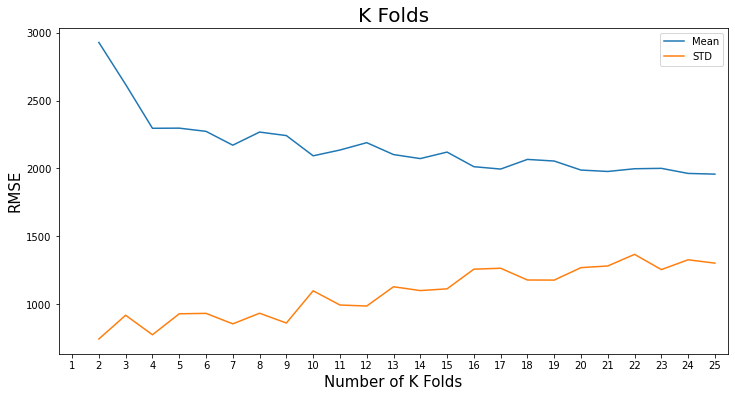

In [14]:
# Visualize K folds
plt.figure(figsize=(12,6))

plt.plot(list(k_folds_means.keys()), list(k_folds_means.values()), label='Mean')
plt.plot(list(k_folds_std.keys()), list(k_folds_std.values()), label='STD')
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Folds", size=15)
plt.title("K Folds", size=20)

In this graph we have the mean RSME along with the standard deviation. A low mean RMSE is good but not if it comes with high variance. Likewise, a low variance is desriable but only if it comes with a low mean. There is usually a trade off between the two. In the graph above I would recommend 7 k folds as the variance is still low and the mean has begun to drop towards it's lowest point. 

# Conclusion

Throghout this project the closest we got in predicting the price was to use the attributes "curb-weight", "horsepower", "length", "highway-mpg", "engine-size" together along with a k number of 3. This predicted the market price of each car to an RMSE of 1686.66.